In [1]:
cd ..

/home/savannahgramze/research/lactea-filament/lactea-filament


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import regions
from regions import Regions
from astropy.wcs import WCS
from astropy.io import fits

import jwst_plots
import isochrone_plots
from jwst_plots import JWSTCatalog
from isochrone_plots import Isochrone

import importlib as imp

from astropy.visualization import simple_norm

from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC
from dust_extinction.parameter_averages import CCM89

In [3]:
imp.reload(jwst_plots)
imp.reload(isochrone_plots)

<module 'isochrone_plots' from '/home/savannahgramze/research/lactea-filament/lactea-filament/isochrone_plots.py'>

In [4]:
basepath = '/home/savannahgramze/research/Research/JWST/cloudc/'

# Catalog Setup

In [5]:
fn_405 = f'{basepath}/images/F410_reproj_merged-fortricolor.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [6]:
reg_filament = Regions.read(f'{basepath}/regions_/filament_short.region')

In [7]:
cat_fn = f'{basepath}/basic_merged_indivexp_photometry_tables_merged.fits'
basetable = Table.read(cat_fn)

In [8]:
base_jwstcatalog = JWSTCatalog(basetable)
mask_qf = base_jwstcatalog.get_qf_mask(0.4)
cat_use = JWSTCatalog(basetable[mask_qf])

In [9]:
mask_reg = base_jwstcatalog.get_region_mask(reg_filament, wcs=ww)
mask = np.logical_and(mask_qf, mask_reg)
#cat_use_in = JWSTCatalog(basetable[mask])

In [10]:
cat_use_in = JWSTCatalog(basetable[mask])

# Isochrone Setup

In [11]:
mist = Table.read(f'{basepath}/isochrones/MIST_iso_633a08f2d8bb1.iso.cmd', 
                  header_start=12, data_start=13, format='ascii', delimiter=' ', comment='#')

In [18]:
dist = 5*u.kpc
Av = 15

iso_mist_5 = isochrone_plots.Isochrone(mist, distance=dist, age=5, Av=Av)
iso_mist_10 = isochrone_plots.Isochrone(mist, distance=dist, age=10, Av=Av)

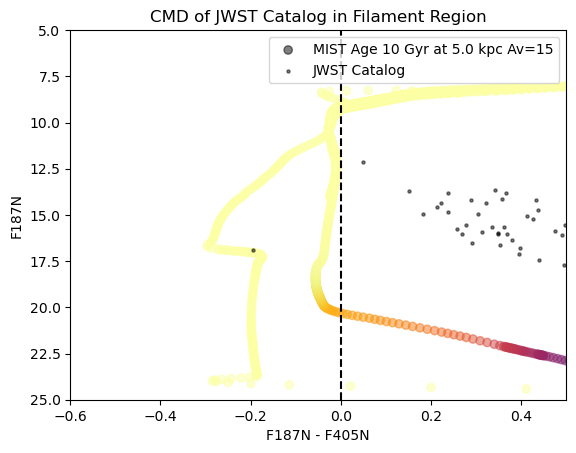

In [19]:
ax = plt.subplot(111)
iso_mist_10.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 10 Gyr at {dist.value} kpc Av={Av}', cmap='inferno',
                     c=iso_mist_10.M_init, norm=simple_norm(iso_mist_10.M_init, stretch='asinh'))
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=0.5)

ax.set_ylim(25,5)
ax.set_xlim(-0.6, 0.5)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
ax.legend()

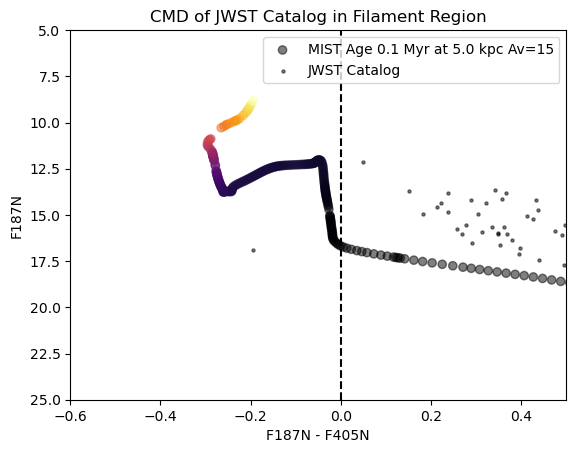

In [20]:
ax = plt.subplot(111)
iso_mist_5.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 0.1 Myr at {dist.value} kpc Av={Av}', cmap='inferno',
                        c=iso_mist_5.M_init, norm=simple_norm(iso_mist_5.M_init, stretch='asinh'))
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=0.5)

ax.set_ylim(25,5)
ax.set_xlim(-0.6, 0.5)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
ax.legend()

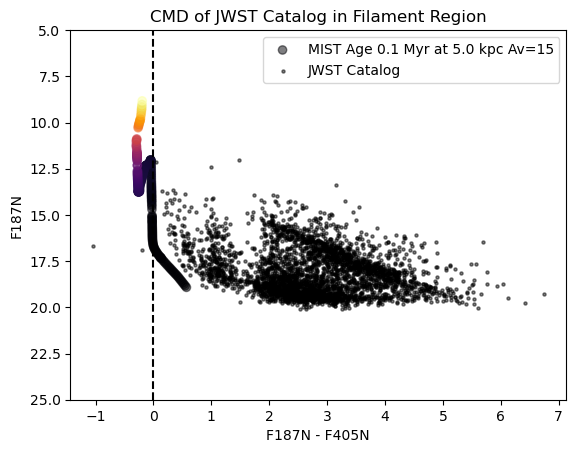

In [21]:
ax = plt.subplot(111)
iso_mist_5.plot_isochrone(ax=ax, alpha=0.5, label=f'MIST Age 0.1 Myr at {dist.value} kpc Av={Av}', cmap='inferno',
                        c=iso_mist_5.M_init, norm=simple_norm(iso_mist_5.M_init, stretch='asinh'))
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, label='JWST Catalog', c='k', s=5, alpha=0.5)

ax.set_ylim(25,5)
#ax.set_xlim(-0.6, 0.5)
#ax.set_xlim(-0.6, 0.6)
ax.axvline(0, linestyle='--', color='k')
ax.set_title('CMD of JWST Catalog in Filament Region')
ax.legend()

In [16]:
(10**5*u.yr).to(u.Myr)

<Quantity 0.1 Myr>

In [17]:
(10**10*u.yr).to(u.Gyr)

<Quantity 10. Gyr>